In [1]:
import numpy as np 
import pandas as pd

df = pd.DataFrame(
        {
            "A": [1, np.nan, 3, 4, 5],
            "B": [6, 7, 8, np.nan, 10],
            "C": [11, 12, 13, 14, 15]
        }
)
df

,A,B,C
0,1.0,6.0,11
1,NaN,7.0,12
2,3.0,8.0,13
3,4.0,NaN,14
4,5.0,10.0,15


In [2]:
df.isnull()

,A,B,C
0,False,False,False
1,True,False,False
2,False,False,False
3,False,True,False
4,False,False,False


In [5]:
from sklearn.preprocessing import Imputer

imp = Imputer(strategy ="mean", axis=0)
imp.fit(df)
imp.transform(df)

/Users/ishidzukahiroyuki/.pyenv/versions/anaconda3-2019.07/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 1.  ,  6.  , 11.  ],
       [ 3.25,  7.  , 12.  ],
       [ 3.  ,  8.  , 13.  ],
       [ 4.  ,  7.75, 14.  ],
       [ 5.  , 10.  , 15.  ]])

In [6]:
import pandas as pd
df = pd.DataFrame(
    {
        "A": [1,2,3,4,5],
        "B": ["a","b","a","b","c",]
    }
)
df

,A,B
0,1,a
1,2,b
2,3,a
3,4,b
4,5,c


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['B'])
le.transform(df['B'])

array([0, 1, 0, 1, 2])

In [10]:
le.classes_

array(['a', 'b', 'c'], dtype=object)

In [11]:
from sklearn.preprocessing import OneHotEncoder

df_ohe = df.copy()

le = LabelEncoder()
df_ohe['B'] = le.fit_transform(df_ohe['B'])
ohe = OneHotEncoder(categorical_features=[1])
ohe.fit_transform(df_ohe).toarray()

/Users/ishidzukahiroyuki/.pyenv/versions/anaconda3-2019.07/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/ishidzukahiroyuki/.pyenv/versions/anaconda3-2019.07/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[1., 0., 0., 1.],
       [0., 1., 0., 2.],
       [1., 0., 0., 3.],
       [0., 1., 0., 4.],
       [0., 0., 1., 5.]])

In [12]:
df = pd.DataFrame(
    {
        "A": [1,2,3,4,5],
        "B": [100, 200, 400, 500, 800]
    }
)
df

,A,B
0,1,100
1,2,200
2,3,400
3,4,500
4,5,800


In [15]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
stdsc.fit(df)
stdsc.transform(df)

array([[-1.41421356, -1.22474487],
       [-0.70710678, -0.81649658],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.40824829],
       [ 1.41421356,  1.63299316]])

In [16]:
from sklearn.preprocessing import MinMaxScaler
mmsc = MinMaxScaler()
mmsc.fit(df)
mmsc.transform(df)

array([[0.        , 0.        ],
       [0.25      , 0.14285714],
       [0.5       , 0.42857143],
       [0.75      , 0.57142857],
       [1.        , 1.        ]])

In [18]:
from sklearn.datasets import load_iris
iris = load_iris()
x, y = iris.data, iris.target
print("x: ")
print(x[:5, :])
print("y: ")
print(y[:5])

x: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
y: 
[0 0 0 0 0]


In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


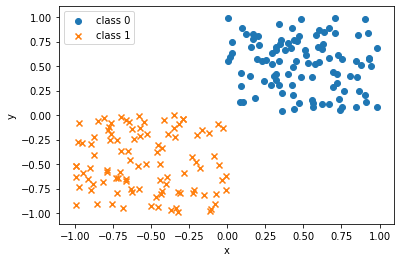

In [21]:
import matplotlib.pyplot as plt 
np.random.seed(123)
x0 = np.random.uniform(size=(100,2))
y0 = np.repeat(0, 100)
x1 = np.random.uniform(-1.0, 0.0, size=(100,2))
y1 = np.repeat(1, 100)
fig, ax = plt.subplots()
ax.scatter(x0[:, 0], x0[:, 1], marker="o", label="class 0")
ax.scatter(x1[:, 0], x1[:, 1], marker="x", label="class 1")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
plt.show()

In [40]:
from sklearn.svm import SVC

def plot_boundary_margin_sv(x0, y0, x1, y1, kernel, C, xmin=-1, xmax=1, ymin=-1, ymax=1):
    svc = SVC(kernel=kernel, C=C)
    svc.fit(np.vstack((x0, x1)), np.hstack((y0, y1)))
    fig, ax = plt.subplots()
    ax.scatter(x0[:, 0], x0[:, 1], marker="o", label="class 0")
    ax.scatter(x1[:, 0], x1[:, 1], marker="x", label="class 1")
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    p = svc.decision_function(xy).reshape(100,100)
    ax.contour(xx, yy, p, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])
    ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=250, facecolors="none", edgecolors="black")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend(loc="best")
    plt.show()

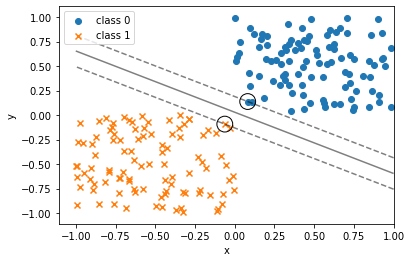

In [41]:
plot_boundary_margin_sv(x0, y0, x1, y1, kernel="linear", C=1e6)

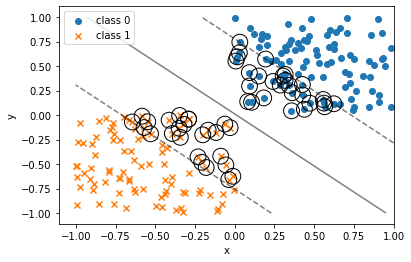

In [42]:
plot_boundary_margin_sv(x0, y0, x1, y1, kernel="linear", C=0.1)

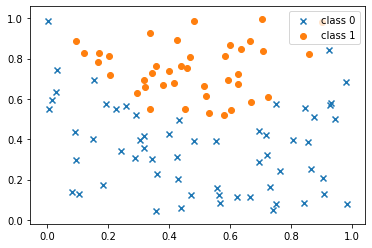

In [44]:
np.random.seed(123)
x = np.random.random(size=(100, 2))
y = (x[:, 1] > 2*(x[:, 0]-0.5)**2 + 0.5).astype(int)
fig, ax = plt.subplots()
ax.scatter(x[y == 0, 0], x[y == 0, 1], marker="x", label="class 0")
ax.scatter(x[y == 1, 0], x[y == 1, 1], marker="o", label="class 1")
ax.legend()
plt.show()

/Users/ishidzukahiroyuki/.pyenv/versions/anaconda3-2019.07/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


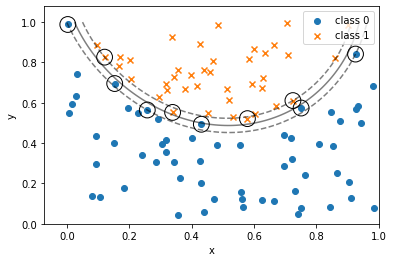

In [46]:
x0, x1 = x[y == 0, :], x[y == 1, :]
y0, y1 = y[y == 0], y[y == 1]
plot_boundary_margin_sv(x0, y0, x1, y1, kernel="rbf", C=1e3, xmin=0, ymin=0)

In [48]:
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
x, y = iris.data, iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [50]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, filled=True, rounded=True, 
                           class_names=["Setosa", "Versicolor", "Virginica"], 
                           feature_names=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"], out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png("tree.png")

InvocationException: GraphViz's executables not found

In [51]:
y_pred = tree.predict(x_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

In [52]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=123)
forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
x, y = boston.data, boston.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
y_pred = lr.predict(x_test)

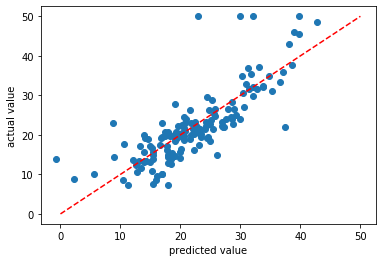

In [59]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test)
ax.plot((0, 50), (0, 50), linestyle="dashed", color="red")
ax.set_xlabel("predicted value")
ax.set_ylabel("actual value")
plt.show()

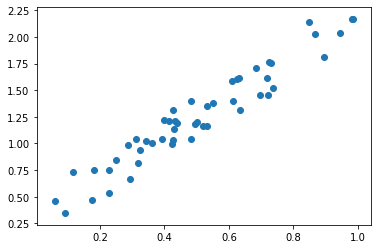

In [62]:
np.random.seed(123)
x = np.random.random(size=50)
y =  2*x + 0.5*np.random.rand(50)
fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()

In [63]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(np.hstack((x[:, np.newaxis], y[:, np.newaxis])))

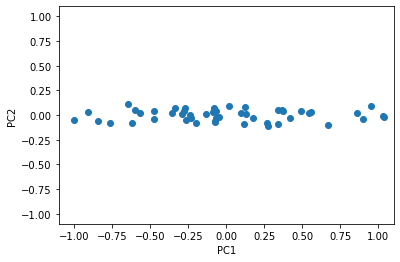

In [64]:
fig, ax = plt.subplots()
ax.scatter(x_pca[:, 0], x_pca[:, 1])
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
plt.show()

In [65]:
iris = load_iris()
x, y = iris.data[:100, :], iris.target[:100]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

/Users/ishidzukahiroyuki/.pyenv/versions/anaconda3-2019.07/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [69]:
from sklearn.model_selection import cross_val_score

svc = SVC()
cross_val_score(svc, x, y, cv=10, scoring="precision")

/Users/ishidzukahiroyuki/.pyenv/versions/anaconda3-2019.07/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/ishidzukahiroyuki/.pyenv/versions/anaconda3-2019.07/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/ishidzukahiroyuki/.pyenv/versions/anaconda3-2019.07/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid t

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

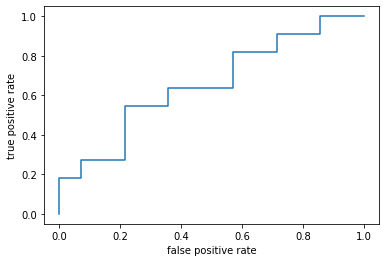

In [70]:
fpr = np.array([0,0,0,1,1,2,3,3,3,3,4,5,5,6,7,8,8,8,9,10,10,11,12,12,13,14])/14
tpr = np.array([0,1,2,2,3,3,3,4,5,6,6,6,7,7,7,7,8,9,9,9,10,10,10,11,11,11])/11
fig, ax = plt.subplots()
ax.step(fpr, tpr)
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate")
plt.show()

In [71]:
from sklearn.metrics import roc_curve

labels = np.array([1,1,0,1,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0])
probs = np.array([0.98, 0.95, 0.9, 0.87, 0.85, 0.8, 0.75, 0.71, 0.63, 0.55, 0.51, 
                  0.47, 0.43, 0.38, 0.35, 0.31, 0.28, 0.24, 0.22, 0.19, 0.15, 0.12, 0.08, 0.04, 0.01])
fpr, tpr, threshold = roc_curve(labels, probs)
print("偽陽性率： ", fpr)
print("真陽性率： ", tpr)

偽陽性率：  [0.         0.         0.         0.07142857 0.07142857 0.21428571
 0.21428571 0.35714286 0.35714286 0.57142857 0.57142857 0.71428571
 0.71428571 0.85714286 0.85714286 1.        ]
真陽性率：  [0.         0.09090909 0.18181818 0.18181818 0.27272727 0.27272727
 0.54545455 0.54545455 0.63636364 0.63636364 0.81818182 0.81818182
 0.90909091 0.90909091 1.         1.        ]


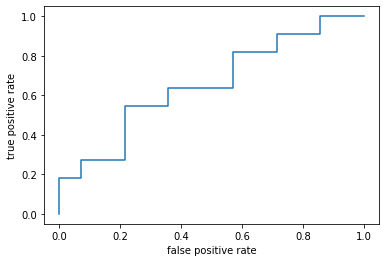

In [72]:
fig, ax = plt.subplots()
ax.step(fpr, tpr)
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate")
plt.show()

In [73]:
from sklearn.metrics import roc_auc_score
roc_auc_score(labels, probs)

0.6558441558441558